In [52]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/Users/tinsuriyasuphapong/opt/anaconda3/envs/IDS-A5/bin/python
3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:24:27) [Clang 14.0.6 ]
sys.version_info(major=3, minor=10, micro=9, releaselevel='final', serial=0)


In [53]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib  as plt
import matplotlib.pyplot as pt
from scipy import stats
import sklearn
import math
from statistics import mean
print(f"matplotlib version:{plt.__version__}")
print(f"numpy version:{np.__version__}")
print(f"pandas version:{pd.__version__}")
print(f"scipy version:{sci.__version__}")
print(f"seaborn version:{sns.__version__}")
print(f"sklearn version:{sklearn.__version__}")

matplotlib version:3.7.0
numpy version:1.24.0
pandas version:1.5.0
scipy version:1.10.0
seaborn version:0.12.0
sklearn version:1.0.2


#### Exercise 1 (Gradient descent & learning rates)

Apply gradient descent to find the minimum of the function
$f(x) = e^{-x/2} + 10x^{2}$. 

1. Manually derive the function f(x) and implement a function that computes this derivative f′(x) = 
$\frac{d}{dx}(e^{\frac{-x}{2}}) + \frac{d}{dx}(10x^{2})$ 

then we get $-\frac{1}{2}e^{\frac{-x}{2}} + 20x$

2. Implement and apply gradient descent with learning rates η ∈ {0.1,0.01,0.001,0.0001}. Your implementation should be done without any external Python packages (you may use NumPy, but it is not needed)

In [10]:
def fx(x):
    fx = math.exp(-x/2) + 10*x**2
    return fx

In [11]:
#define derivertive of fx 
def df(x):
    dydx = (-1/2)*math.e**(-x/2) + 20*x
    return dydx

In [12]:
#Gradient descent function 
def gradient_descent(x_init,learning_rate,iterations):
    x = x_init
    x_list = [x]
    for i in range(iteration):
        x = x - learning_rate*df(x)
        x_list.append(x)
    return x_list   

3. For each of the learning rates, do the following:\
(a) Take x = 1 as a starting point.\
(b) Visualize the tangent lines and gradient descent steps for the first three iterations (produce 4 plots for your report corresponding to gradient descent with the four learning rates). The first tangent line should be at the initial point x = 1.

In [8]:
#initial setting 
x_start = 1
learning_rate = [0.1,0.01,0.001,0.0001]
x_range = np.arange(-2,2,0.001)
iteration = 3

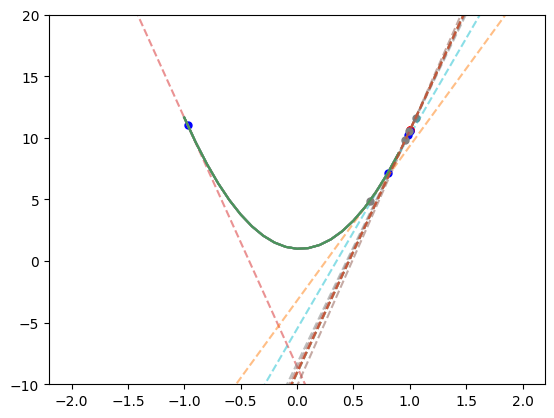

In [13]:
for learn in learning_rate:
    x_list = gradient_descent(x_start,learn,iteration)
    colors = ["red","blue","grey"]
    for i in range(iteration):
        x = x_list[i]
        slope = df(x)
        intercept = fx(x)-slope*x
        tangent_line = [slope*xi+intercept for xi in x_range]
        general_x = np.arange(-1, 1, 0.1).tolist()
        y = [fx(xi) for xi in general_x]
        pt.ylim((-10,20))
        pt.plot(general_x,y,alpha = 0.5) #plot original function fx          
        pt.plot(x,fx(x),marker="o",markersize=5,color=colors[i],label= [i+1])
        pt.plot(x_range,tangent_line,'--',alpha = 0.5,label = tangent_line[i+1])

(c) Visualize gradient descent steps for the first 10 iterations (another 4 plots; no visualization of tangent lines in this case).

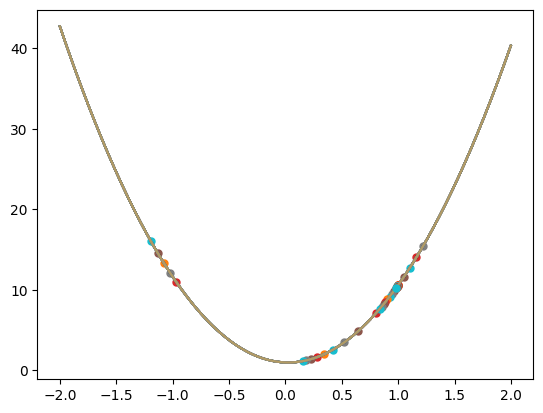

In [14]:
#initial setting 
x_start = 1
learning_rate = [0.1,0.01,0.001,0.0001]
x_range = np.arange(-2,2,0.001)
iteration = 10
for learn in learning_rate:
    x_list = gradient_descent(x_start,learn,iteration)
    for i in range(iteration):
        x = x_list[i]
        general_x = np.arange(-1, 1, 0.1).tolist()
        y = [fx(xi) for xi in x_range]
        pt.plot(x_range,y,alpha = 0.5)
        pt.plot(x,fx(x),marker="o",markersize=5,label= [i+1])

(d) Run the algorithm until the absolute value of the gradient falls below 10−10 or the algorithm has exceeded 10,000 iterations. Report the number of iterations it took the algorithm to converge and the function value at the final iteration (i.e., report 8 values in total, 2 values for each of the 4 learning rates). Discuss briefly which of the learning rates is preferable and why.

In [48]:
def converge(learningrate):    
    current_x = 1 # The algorithm starts at x=1
#learningrate = 0.01 # Learning rate
    precision = 0.0000000001 # Tell when to terminate the algorithm
    absolutevalue = 1 
    max_iteration = 10000 # maximum number of iterations
    iteration = 0 #iteration counter
    df =lambda x: -1/2*math.e**(-x/2) + 20*x #gradient for function 
    while absolutevalue > precision and iteration < max_iteration:
        previous_x = current_x #Store current x value in prev_x
        current_x = current_x - learningrate* df(previous_x) #Grad descent
        absolutevalue = abs(current_x - previous_x) #Change in x
        iteration = iteration+1 #iteration count
    #print("Iteration",iteration,"\nX value is",current_x) #Print iterations  
    print("Learning rate:",learningrate," Iteration:",iteration ,"\n The local minimum occurs at:", current_x, 
      "\n The previous value occurs at:",previous_x)

In [49]:
converge(0.01)

Learning rate: 0.01  Iteration: 96 
 The local minimum occurs at: 0.02469323262707432 
 The previous value occurs at: 0.0246932327189055


In [17]:
converge(0.001)

Learning rate: 0.001  Iteration: 935 
 The local minimum occurs at: 0.024693237100521306 
 The previous value occurs at: 0.024693237200441788


In [18]:
converge(0.0001)

Learning rate: 0.0001  Iteration: 8291 
 The local minimum occurs at: 0.024693281533279352 
 The previous value occurs at: 0.024693281633234174


In [47]:
converge(0.1)

Learning rate: 0.1  Iteration: 67 
 The local minimum occurs at: -61333658091.14947 
 The previous value occurs at: 61333658091.14947


#### Exercise 2 (Logistic regression implementation).
In this exercise, you will implement, run, and test logistic regression on two simple 2-class datasets that are derived from Fisher’s Iris dataset and in the Appendix. You are solving a binary classification task.


1. Create a scatter plot for each training dataset with different colors for the two classes. What do you observe?

In [54]:
Iris2D1_train = np.loadtxt("Iris2D1_train.txt")

In [55]:
Iris2D2_train = np.loadtxt("Iris2D2_train.txt")

[Text(0.5, 1.0, 'Iris2D2_train')]

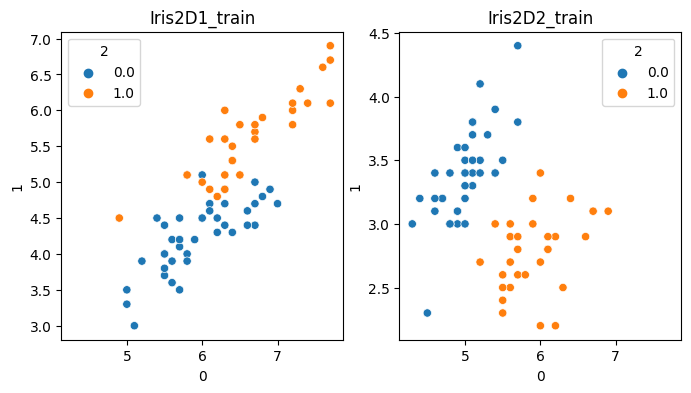

In [56]:
df1 = pd.DataFrame(Iris2D1_train)
df2 = pd.DataFrame(Iris2D2_train)
fig, ax = pt.subplots(1, 2, sharex=True, figsize=(8, 4))
sns.scatterplot(data=df1,x=df1[0],y=df1[1],hue=df1[2],ax=ax[0]).set(title='Iris2D1_train')
sns.scatterplot(data=df2,x=df2[0],y=df2[1],hue=df2[2],ax=ax[1]).set(title='Iris2D2_train')

2. Train a logistic regression model for each of the two Iris datasets described below via PyTorch using stochastic gradient descent (SGD) and the following hyper-parameters: batch size B = 64, learning rate η = 0.1, number of steps N = 10, 000.

In [57]:
import torch
import torch.nn.functional as F
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [123]:
X_train1 = Iris2D1_train[:,0:2]
y_train1 = Iris2D1_train[:,-1]

In [124]:
X_train2 = Iris2D2_train[:,0:2]
y_train2 = Iris2D2_train[:,-1]

In [125]:
# Convert the data to PyTorch tensors
X_train1 = torch.tensor(X_train1, dtype=torch.float32,device =device )
y_train1 = torch.tensor(y_train1, dtype=torch.int64)
X_train2 = torch.tensor(X_train2, dtype=torch.float32)
y_train2 = torch.tensor(y_train2, dtype=torch.int64)

In [62]:
# Define logistic regression model
class LogisticRegression(torch.nn.Module):
    def __init__(self, num_features):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(num_features, 1)
        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()

    def forward(self, x):
        logits = self.linear(x)
        probas = torch.sigmoid(logits)
        return probas

In [89]:
# Define the hyper-parameters
batch_size = 64
learning_rate = 0.1
num_steps = 10000
# Define the SGD optimizer
model = LogisticRegression(num_features=2)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [90]:
X_train_tensor = torch.tensor(X_train1, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train1, dtype=torch.float32, device=device).view(-1, 1)

/var/folders/4s/gskkqj0x1sb_3nbsyrts3dgh0000gn/T/ipykernel_19383/3540069458.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train1, dtype=torch.float32, device=device)
/var/folders/4s/gskkqj0x1sb_3nbsyrts3dgh0000gn/T/ipykernel_19383/3540069458.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train1, dtype=torch.float32, device=device).view(-1, 1)


In [94]:
from torch.utils.data import DataLoader
train_loader = DataLoader(list(zip(X_train_tensor,y_train_tensor)), shuffle=True, batch_size=64)
for X_batch, y_batch in train_loader:
#    print(X_batch)
     print(y_batch)

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.]])
tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.]])


In [126]:
class LogisticRegression(torch.nn.Module):

    def __init__(self, num_features):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(num_features, 1)     
        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()
        
    def forward(self, x):
        logits = self.linear(x)
        probas = torch.sigmoid(logits)
        return probas

model = LogisticRegression(num_features=2).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [107]:
def comp_accuracy(label_var, pred_probas):
    pred_labels = torch.where((pred_probas > 0.5), 1, 0).view(-1)
    acc = torch.sum(pred_labels == label_var.view(-1)).float() / label_var.size(0)
    return acc

num_steps = 10000

X_train_tensor = torch.tensor(X_train1, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train1, dtype=torch.float32, device=device).view(-1, 1)

for step in range(num_steps):
    list_acc=[]
    train_loader = DataLoader(list(zip(X_train_tensor,y_train_tensor)), shuffle=True, batch_size=64)
    for X_batch, y_batch in train_loader:
    
        output = model(X_batch)  # Compute outputs
    
        loss = F.binary_cross_entropy(output, y_batch, reduction='sum') # Compute gradients
        optimizer.zero_grad()
        loss.backward()
    
        optimizer.step()  # Update weights
    
        #### Printing ####      
        pred_probas = model(X_batch)
        acc = comp_accuracy(y_batch, pred_probas)
        list_acc.append(acc.item())
#        print('Step: %03d' % (step + 1), end="")
#        print(' | Train ACC: %.3f' % acc, end="")
#        print(' | Cost: %.3f' % F.binary_cross_entropy(pred_probas, y_batch))

print("Avarage Accuracy:",mean(list_acc))    
print('\nModel parameters:')
print('  Weights: %s' % model.linear.weight)
print('  Bias: %s' % model.linear.bias)

/var/folders/4s/gskkqj0x1sb_3nbsyrts3dgh0000gn/T/ipykernel_19383/2404501794.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train1, dtype=torch.float32, device=device)
/var/folders/4s/gskkqj0x1sb_3nbsyrts3dgh0000gn/T/ipykernel_19383/2404501794.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train1, dtype=torch.float32, device=device).view(-1, 1)


Avarage Accuracy: 0.6901041567325592

Model parameters:
  Weights: Parameter containing:
tensor([[-21.4066, -14.0420]], requires_grad=True)
  Bias: Parameter containing:
tensor([-3.7625], requires_grad=True)


Data set 1

Avarage Accuracy: 0.6901041567325592

Model parameters:
  Weights: Parameter containing:
tensor([[-21.4066, -14.0420]], requires_grad=True)
  Bias: Parameter containing:
tensor([-3.7625], requires_grad=True)

In [108]:
#dataset2
X_train_tensor = torch.tensor(X_train2, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train2, dtype=torch.float32, device=device).view(-1, 1)

/var/folders/4s/gskkqj0x1sb_3nbsyrts3dgh0000gn/T/ipykernel_19383/871279354.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train2, dtype=torch.float32, device=device)
/var/folders/4s/gskkqj0x1sb_3nbsyrts3dgh0000gn/T/ipykernel_19383/871279354.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train2, dtype=torch.float32, device=device).view(-1, 1)


In [109]:
from torch.utils.data import DataLoader
train_loader = DataLoader(list(zip(X_train_tensor,y_train_tensor)), shuffle=True, batch_size=64)
for X_batch, y_batch in train_loader:
#    print(X_batch)
     print(y_batch)

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.]])
tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.]])


In [110]:
# Define the hyper-parameters
batch_size = 64
learning_rate = 0.1
num_steps = 10000
# Define the SGD optimizer
model = LogisticRegression(num_features=2)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [119]:
def comp_accuracy(label_var, pred_probas):
    pred_labels = torch.where((pred_probas > 0.5), 1, 0).view(-1)
    acc = torch.sum(pred_labels == label_var.view(-1)).float() / label_var.size(0)
    return acc

num_steps = 10000

X_train_tensor = torch.tensor(X_train2, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train2, dtype=torch.float32, device=device).view(-1, 1)

for step in range(num_steps):
    list_acc=[]
    train_loader = DataLoader(list(zip(X_train_tensor,y_train_tensor)), shuffle=True, batch_size=64)
    for X_batch, y_batch in train_loader:
    
        output = model(X_batch)  # Compute outputs
    
        loss = F.binary_cross_entropy(output, y_batch, reduction='sum') # Compute gradients
        optimizer.zero_grad()
        loss.backward()
    
        optimizer.step()  # Update weights
    
        #### Printing ####      
        pred_probas = model(X_batch)
        acc = comp_accuracy(y_batch, pred_probas)
        list_acc.append(acc.item())
#        print('Step: %03d' % (step + 1), end="")
#        print(' | Train ACC: %.3f' % acc, end="")
#        print(' | Cost: %.3f' % F.binary_cross_entropy(pred_probas, y_batch))

print("Avarage Accuracy:",mean(list_acc))    
print('\nModel parameters:')
print('  Weights: %s' % model.linear.weight)
print('  Bias: %s' % model.linear.bias)

/var/folders/4s/gskkqj0x1sb_3nbsyrts3dgh0000gn/T/ipykernel_19383/514698823.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train2, dtype=torch.float32, device=device)
/var/folders/4s/gskkqj0x1sb_3nbsyrts3dgh0000gn/T/ipykernel_19383/514698823.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train2, dtype=torch.float32, device=device).view(-1, 1)


Avarage Accuracy: 0.4609375

Model parameters:
  Weights: Parameter containing:
tensor([[14.4222,  4.7179]], requires_grad=True)
  Bias: Parameter containing:
tensor([2.1203], requires_grad=True)


Data set 2 
Avarage Accuracy: 0.4609375
Model parameters:
  Weights: Parameter containing:
tensor([[14.4222,  4.7179]], requires_grad=True)
  Bias: Parameter containing:
tensor([2.1203], requires_grad=True)

3. For both datasets, report the training and test accuracy. Furthermore, report the three param- eters of the final logistic regression models.



Data set 1\
Avarage Accuracy: 0.6901041567325592\
Model parameters:\
Weights: Parameter containing:\
tensor([[-21.4066, -14.0420]])\
Bias: Parameter containing:\
tensor([-3.7625])

Data set 2 \
Avarage Accuracy: 0.4609375 \
Model parameters: \
  Weights: Parameter containing: \
tensor([[14.4222,  4.7179]])\
  Bias: Parameter containing:\
tensor([2.1203])

4. Repeat step 2 and 3, but this time use batch size B = 4. Describe how this change affects your results. Also briefly discuss the implications of this change on the number of training epochs. It is not necessary to report the parameters of your models for this part of the exercise.

In [130]:
def comp_accuracy(label_var, pred_probas):
    pred_labels = torch.where((pred_probas > 0.5), 1, 0).view(-1)
    acc = torch.sum(pred_labels == label_var.view(-1)).float() / label_var.size(0)
    return acc

num_steps = 10000

X_train_tensor = torch.tensor(X_train1, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train1, dtype=torch.float32, device=device).view(-1, 1)

for step in range(num_steps):
    list_acc=[]
    train_loader = DataLoader(list(zip(X_train_tensor,y_train_tensor)), shuffle=True, batch_size=4)
    for X_batch, y_batch in train_loader:
    
        output = model(X_batch)  # Compute outputs
    
        loss = F.binary_cross_entropy(output, y_batch, reduction='sum') # Compute gradients
        optimizer.zero_grad()
        loss.backward()
    
        optimizer.step()  # Update weights
    
        #### Printing ####      
        pred_probas = model(X_batch)
        acc = comp_accuracy(y_batch, pred_probas)
        list_acc.append(acc.item())
#        print('Step: %03d' % (step + 1), end="")
#        print(' | Train ACC: %.3f' % acc, end="")
#        print(' | Cost: %.3f' % F.binary_cross_entropy(pred_probas, y_batch))

print("Avarage Accuracy:",mean(list_acc))    
print('\nModel parameters:')
print('  Weights: %s' % model.linear.weight)
print('  Bias: %s' % model.linear.bias)

/var/folders/4s/gskkqj0x1sb_3nbsyrts3dgh0000gn/T/ipykernel_19383/1824370718.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train1, dtype=torch.float32, device=device)
/var/folders/4s/gskkqj0x1sb_3nbsyrts3dgh0000gn/T/ipykernel_19383/1824370718.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train1, dtype=torch.float32, device=device).view(-1, 1)


Avarage Accuracy: 0.9722222222222222

Model parameters:
  Weights: Parameter containing:
tensor([[-8.5366, 23.3966]], requires_grad=True)
  Bias: Parameter containing:
tensor([-60.2581], requires_grad=True)


Dataset 1 

Avarage Accuracy: 0.9722222222222222
Model parameters:
  Weights: Parameter containing:
tensor([[-8.5366, 23.3966]], requires_grad=True)
  Bias: Parameter containing:
tensor([-60.2581], requires_grad=True)

In [133]:
#dataset 2
def comp_accuracy(label_var, pred_probas):
    pred_labels = torch.where((pred_probas > 0.5), 1, 0).view(-1)
    acc = torch.sum(pred_labels == label_var.view(-1)).float() / label_var.size(0)
    return acc

num_steps = 10000

X_train_tensor = torch.tensor(X_train2, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train2, dtype=torch.float32, device=device).view(-1, 1)

for step in range(num_steps):
    list_acc=[]
    train_loader = DataLoader(list(zip(X_train_tensor,y_train_tensor)), shuffle=True, batch_size=4)
    for X_batch, y_batch in train_loader:
    
        output = model(X_batch)  # Compute outputs
    
        loss = F.binary_cross_entropy(output, y_batch, reduction='sum') # Compute gradients
        optimizer.zero_grad()
        loss.backward()
    
        optimizer.step()  # Update weights
    
        #### Printing ####      
        pred_probas = model(X_batch)
        acc = comp_accuracy(y_batch, pred_probas)
        list_acc.append(acc.item())
#        print('Step: %03d' % (step + 1), end="")
#        print(' | Train ACC: %.3f' % acc, end="")
#        print(' | Cost: %.3f' % F.binary_cross_entropy(pred_probas, y_batch))

print("Avarage Accuracy:",mean(list_acc))    
print('\nModel parameters:')
print('  Weights: %s' % model.linear.weight)
print('  Bias: %s' % model.linear.bias)

/var/folders/4s/gskkqj0x1sb_3nbsyrts3dgh0000gn/T/ipykernel_19383/3449330986.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train2, dtype=torch.float32, device=device)
/var/folders/4s/gskkqj0x1sb_3nbsyrts3dgh0000gn/T/ipykernel_19383/3449330986.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train2, dtype=torch.float32, device=device).view(-1, 1)


Avarage Accuracy: 1.0

Model parameters:
  Weights: Parameter containing:
tensor([[ 26.8019, -23.7009]], requires_grad=True)
  Bias: Parameter containing:
tensor([-69.9410], requires_grad=True)


Dataset2
Avarage Accuracy: 1.0
Model parameters:
Weights: Parameter containing:
tensor([[ 26.8019, -23.7009]], requires_grad=True)
Bias: Parameter containing:
tensor([-69.9410], requires_grad=True)


Changing the number of batch size from 64 to 4. The average accuracy is significantly increased. The run time of batchsize =4 is longer than batchsize = 64. 

Training epochs are primarily used to increase the model's accuracy by giving it several opportunities to learn from training data. The model adjusts its parameters for each epoch based on the errors it makes on the training data. This procedure can be repeated several times to help the model learn to generalize more effectively. Yet using too many epochs can cause overfitting, while using too few might cause underfitting. Hence, finding the optimal number of epochs needs balancing the tradeoff between underfitting and overfitting and is a critical hyperparameter tuning problem.

#### Exercise 3

1. Calculate and report the local gradients, indicated with a red question mark, based on the inputs and outputs/activations of each operation (values in blue) and the final gradient (which is equal to 1.00). For each unique operation, also write down the function and its derivative (which you use to compute the local gradients). E.g., for a “+c” operation, i.e. a function f (x) = x + c with constant c, the derivative is ∂f = 1.
∂x

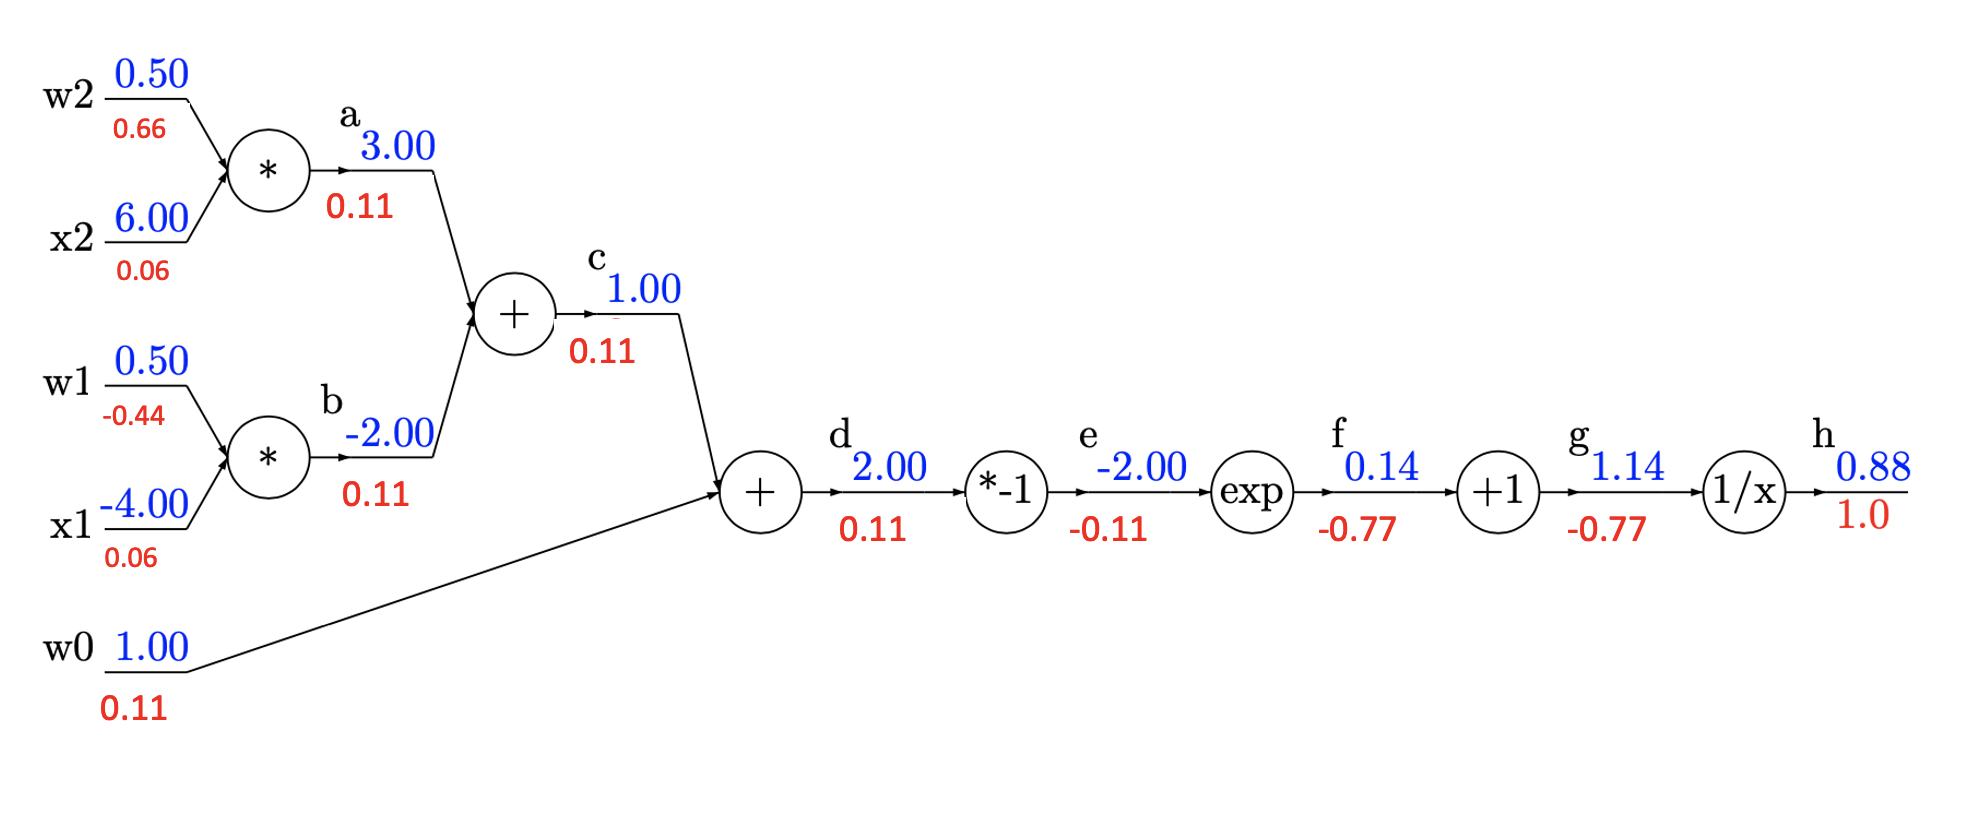

In [137]:
from IPython.display import Image
Image(filename='backprop.png') 

at h, the local gradient:\
basecase is always = 1

at g, the local gradient:\
$\frac{\partial}{\partial x} [\frac{1}{x}]$ = $\frac{-1}{x^{2}}$\
So we can plug in value = $\frac{-1}{(1.14)^{2}}  = -0.77$

at f, the local gradient:\
$\frac{\partial}{\partial x} [x+1]$ = 1, so 1*(-0.77) = -0.77

at e, the local gradient:\
$\frac{\partial}{\partial x} [e^x]$  =  $[e^x]$, so we plug in $[e^{-2}]$ =0.14\
we can compute the value 0.14*(-0.77) = -0.11

at d, the local gradient:\
$\frac{\partial}{\partial x} [-x]$ = -1\
so we can compute (-1)*(-0.11) = 0.11

at c and $w_{0}$, the local gradient:\
$\frac{\partial}{\partial x} [x+y]$ = 1  ;  $\frac{\partial}{\partial y} [x+y]$ = 1\
So both of them  get 1*0.11 = 0.11

at a and b, the local gradient:\
$\frac{\partial}{\partial x} [x+y]$ = 1  ;  $\frac{\partial}{\partial y} [x+y]$ = 1\
So both of them  get 1*0.11 = 0.11

at $w_{2}$ and $x_{2}$ , the local gradient:\
$\frac{\partial}{\partial x} [xy]$ = y  ;  $\frac{\partial}{\partial y} [xy]$ = x\
So $w_{2}$ = 6.00 * 0.11 = 0.66\
   $x_{2}$ = 0.50 * 0.11 = 0.06

at $w_{1}$ and $x_{1}$, the local gradient: \
$\frac{\partial}{\partial x} [xy]$ = y  ;  $\frac{\partial}{\partial y} [xy]$ = x\
So $w_{1}$ = -4 * 0.11 = -0.44\
   $x_{1}$ = 0.50 * 0.11 = 0.06

2. What patterns do you see for backpropagation through addition and multiplication operations, i.e., is there a specific way gradients are routed through all addition operations (and likewise for multiplication operations)?

When backpropagating through addition, the gradient of the output with respect to the input is simply 1, so during backwoard pass, a sum node is going to distribute and copy those gradients from the upstream to the downstream. The multiplication gate is kinda swap multiplier because the derivertive of xy with respect to x is y, and  derivertive of xy with respect to y is x which means the local gradient for one of the input is the other input as shown at $w_{2}$ , $x_{2}$, $w_{1}$ and $x_{1}$.

3. Assume we are running gradient descent on this computational graph. Report how the weights w = (w0, w1, w2) = (1.00, 0.50, 0.50) would change after one update step of gradient descent with learning rate η = 0.1. Do we need the local gradients of our input features x1 and x2?

 dL/dw0 = (y_hat - y)\
 dL/dw1 = (y_hat - y)*x1\
 dL/dw2 = (y_hat - y)*x2

Plugging in the values for the current weights, learning rate, and  x1=-4 and x2=6, we get:

 w0 := 1.00 - 0.1*(y_hat - y)\
 w1 := 0.50 - 0.1*(y_hat - y)*(-4)\
 w2 := 0.50 - 0.1(y_hat - y)*(6)

So we need the local gradients of our input features x1 and x2 in order to compute the gradients of the loss with respect to the weights.

#### Exercise 4

To find the derivation of $∇E_{in}(w)$, we first need to expand the expression for $E_{in}(w)$:

$E_{in}(w) = \frac{1}{N} \sum_{n=1}^{N} \ln(1 + e^{-y_n w^T x_n})$

Taking the gradient of $E_{in}(w)$ with respect to w, we get:

$∇E_{in}(w) = \frac{1}{N} \sum_{n=1}^{N} \frac{\partial}{\partial w} \ln(1 + e^{-y_n w^T x_n})$\
from $\frac{d}{dx}[ln(x)]$ = $\frac{1}{x}$

Using the chain rule, we can simplify this expression as:

$∇E_{in}(w) = \frac{1}{N} \sum_{n=1}^{N} \frac{1}{1 + e^{-y_n w^T x_n}} \cdot \frac{\partial}{\partial w} (1 + e^{-y_n w^T x_n})$

Expanding the derivative, we get:

$∇E_{in}(w) = \frac{1}{N} \sum_{n=1}^{N} \frac{1}{1 + e^{-y_n w^T x_n}} \cdot (-y_n x_n e^{-y_n w^T x_n})$

From $\Theta(s) = \frac{e^{s}}{1+e^{s}}$, we can simplify as:

$∇E_{in}(w) = \frac{1}{N} \sum_{n=1}^{N} \frac{1}{1 + e^{-y_n w^T x_n}} \cdot (-y_n x_n e^{-y_n w^T x_n})$

From $\Theta(s) = \frac{e^{s}}{1+e^{s}}$, we can simplify as:

$∇E_{in}(w) = \frac{1}{N} \sum_{n=1}^{N} (-y_n x_n) \cdot \Theta(-y_n w^T x_n)$

2. Argue that a misclassified example contributes more to the gradient than a correctly classified
one.


For a correctly classified example,  $y_{n} * w^{T}* x_{n}$ is positive, so $e^{-y_{n} * w^{T}*x_{n}}$ is small (close to zero). As a result, the fraction $\frac{1}{1+e^{-y_{n} * w^{T}* x_{n}}}$ is close to 1. On the other hand, for a misclassified example, $y_{n} * w^{T}* x_{n}$  is negative, and therefore $e^{-y_{n} * w^{T}*x_{n}}$ is very large, so the fraction $\frac{1}{1+e^{-y_{n} * w^{T}* x_{n}}}$ is close to 0 which gives a large contribution to the gradient.